# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일  
다만 서비스 제공자의 입장에서는??  

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

## requests
> - HTTP 요청을 주고받기 위한 파이썬 패키지
> - 파이썬 내장 패키지는 아니지만 사실상 HTTP 요청을 주고받기 위한 표준이라 생각해도 무방함
> - 웹 페이지에 요청, 업데이트, 삭제 등 인터넷프로토콜을 파이썬으로 제어한다.
> - requests는 요청을 하고 데이터를 전달 받지만 text 혹은 바이너리 형태로만 전달받음.

## BeautifulSoup
> - API는 통신을 위해 정형화 된 데이터 형태의 text, json등을 통신에 사용한다.  
> - requests로 전달받은 데이터를 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### BeautifulSoup 설치

In [16]:
# 패키지 설치 및 import 
# !pip install BeautifulSoup4
from bs4 import BeautifulSoup

## 간단한 데이터 크롤링으로 기본 개념잡기

In [1]:
# 필요패키지 import
import time
import json
import urllib
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 네이버 메인페이지 크롤링

[<img alt="서울경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2019/logo/011.png"/>,
 <img alt="오마이뉴스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/047.png"/>,
 <img alt="스포츠서울" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2020/0708/nsd94830278.png"/>,
 <img alt="코리아헤럴드" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/044.png"/>,
 <img alt="JTBC" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/904.png"/>,
 <img alt="머니투데이" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/008.png"/>,
 <img alt="조선비즈" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/366.png"/>,
 <img alt="YTN" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/052.png"/>,
 <img alt="한국경제
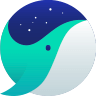
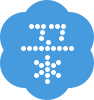

In [15]:
'''
정보를 가져오고자 하는 url 정의
url 정보로 requests로 정보 요청
text 정보를 html로 변환
html에서 우리가 필요한 정보만 선별
'''
# url정의
url = "https://www.naver.com/"
# requsts로 url에 정보요청
resp = requests.get(url) # url로 로컬컴퓨터에서 데이터를 요청하는 작업, 작업결과를 resp 변수에 저장
# 정보를 html 변환 (보기 쉽게)

# html 내에서 우리가 보고 싶은 정보만 선별
html.select("img")


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
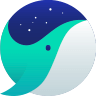
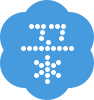

In [14]:
# 전달받은 문자열을 html로 변환
html = BeautifulSoup(resp.text, "html.parser")
html

#### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">현대모비스 뉴스1</span>  
<span class="product" id="1235">현대모비스 뉴스2</span>  

> 단일 셀렉터 html.select('span')
>> <span class="news" id="1234">현대모비스 뉴스1</span>  
<span class="product" id="1235">현대모비스 뉴스2</span>  

> 클래스 포함 셀렉터 html.select('span.news')  
>> <span class="news" id="1234">현대모비스 뉴스1</span>  

> id 포함 셀렉터 html.select('span#1235')  
>> <span class="product" id="1235">현대모비스 뉴스2</span>  

In [24]:
# 다음 뉴스 페이지 크롤링
# url정의
url = 'https://news.daum.net/'

# requsts로 url에 정보요청
resp = requests.get(url) # 로컬컴퓨터에서 다음에 요청하는 작업
# 여러번 요청하는 경우, 다음에서 차단...

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, "html.parser")

html

# html 내에서 뉴스헤더 선별
html.select('a.link_txt') # a 태그안에 클래스명이 link_txt인 라인을 다 가져와라!

html.select('a.link_txt')[0].text.strip()



'재난안전지도·CCTV로 본 경남 상황..가까운 대피소 미리 확인해야[특보]'

In [25]:
# resp.text
html = BeautifulSoup(resp.text, "html.parser")

for item in html.select('a.link_txt')[:-13]:
    print(item.text.strip())

# html.select('a.link_txt') # a 태그안에 클래스명이 link_txt인 라인을 다 가져와라

재난안전지도·CCTV로 본 경남 상황..가까운 대피소 미리 확인해야[특보]
'힌남노' 접근에 전운 감도는 출근길.."한 달 전 악몽 떠올라"
이종섭, 美하원의원들 만나 확장억제·연합방위 지원 당부
"한진칼에 '6600억' 쎄게 물렸다"..얼마나 건질까 [김익환의 컴퍼니워치]
강원도, 강원테크노파크 원장 선임 '절차상 하자' 판단
"태풍 온다, 車 대피시켜"..부산·울산 자동차 공장, 힌남노 대응 총력
"조선 단종에게 바쳤던 토종 다래를 아시나요"
세종 농촌관광협의회 창립.."농촌자원 상품화로 경제가치 창출"
네이버 클로바CIC, 네이버 클라우드에 '흡수설'
'스팩' 청산으로 6개월간 102조원 풀린다..글로벌 증시 숨통 트일 듯
LG에너지솔루션, 애리조나 투자 계획대로 가나?
"尹 녹색 민방위복장 출근, '오늘 퇴근 안 해' 外"[이앤피]
"쌀값 폭락, 생산비 폭등 반영해 농업예산 증액하라"
與 상전위 '비상상황' 유권해석 논의..8일 전국위 소집안 상정
中 국가보안기관 "NSA 해커조직, 6월 中유명대 공격"
"기브 앤 테이크 명확히"..'조원태 회장님 상소문'에 들썩
힌남노 접근에 日 초긴장..규슈 신칸센 6일 첫차부터 운행 취소
요기요, 지역차별·막말 '직장 내 괴롭힘' 논란 임원 A씨 징계 조치
이천시, 쌀 팔아주기 2달간 작년 쌀 1만2천t 모두 판매
힌남노가 휩쓴 日오키나와 순간풍속 40.1m..가로수 뽑히고 지붕 뚫리고
中서 애완견 입양해가더니.."개고기 안되려면 100만원 내놔라" 협박 [나우,어스]
"한진칼에 '6600억' 쎄게 물렸다"..얼마나 건질까 [김익환의 컴퍼니워치]
[아침신문 솎아보기] 중앙 "이재명 대표, 거센 반작용 '조국 사태' 교훈 얻지 못해"
[이 시각 세계] 고르바초프 장례식 수천 명 추모 행렬
이례적 행보..힌남노는 왜 그렇게 움직였을까? [이원주의 날飛]
민주당 4선 중진들 "이재명 檢 소환 부당, 응할 필요 없다"
[이앤피] "尹 녹색 민방위복장 출근, '오늘 퇴근 안 해' 外"
나에게 필요한 세럼 하나는?_선배's 

### 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기

In [102]:
# 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기

# requsts로 url에 정보요청
url = "https://search.daum.net/search?w=tot&q=%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8&DA=NPI&rtmaxcoll=LOT"

resp = requests.get(url)

resp.text

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, "html.parser")

html.select('span.ball')[0].text

# 필요정보 선별
for item in html.select("span.ball"):
    if item.text != "보너스":
        print(item.text)

# lotto = []
# for item in html.select("span.ball"):
#     if item.text != "보너스":
#         lotto.append(int(item.text))
# lotto

6
7
22
32
35
36
19


In [ ]:
# 인터프리터 주피터 노트북은 파이썬의 장점을 가장 잘 살리는 툴!!!

## 패턴 URL 크롤링
앞으로는 패턴을 순환하는 크롤링이 진행이 되는데 서비스 제공자가 이를 감지하고 기계적인 접속을 차단하는 경우가 많습니다.  
이를 해결하기 위한 여러가지 방법을 소개합니다.

In [30]:
# requests 요청 객체의 상태코드
resp.status_code

200

In [26]:
# HTTP 요청 시 상태코드 확인
requests.codes.NOT_FOUND

404

In [103]:
url = "https://www.naver.com/index"
resp = requests.get(url)
resp

<Response [404]>

In [ ]:
resp.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

# 크롤링 시 문제가 없을 경우에만 진행
if resp.status_code == requests.codes.ok:
    # 크롤링 코드 진행
elif resp.status_code == requests.codes.NOT_FOUND:
    # 경고메세지 출력 등등등

In [ ]:
# 차단막는 코드
# 난수 생성 후 요청 작업에 시간차를 둠
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

### 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다 (10페이지)

In [ ]:
# url 설정 (페이지 넘어가는 url 설정을 어떻게 할건지?)
# 순환시키면서 저 requests 요청을 어떻게 컨트롤 할 건지?
    
# url 설정

    
# requests로 데이터 요청하기

    
# html로 변환


# 데이터 선별


<AxesSubplot:ylabel='count'>

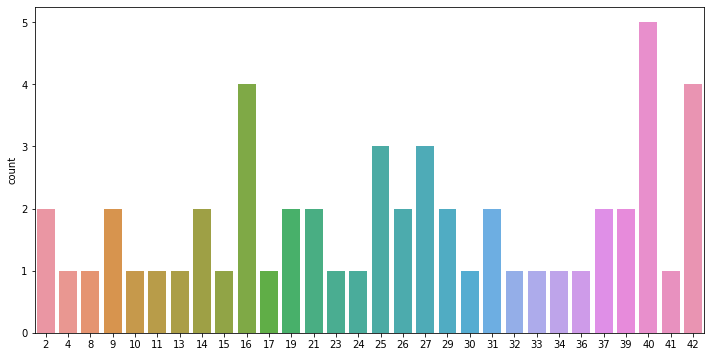

In [17]:
# 데이터 시각화까지


In [18]:
# 데이터프레임으로 저장


,0,1,2,3,4,5
1회차,10,23,29,33,37,40
2회차,9,13,21,25,32,42
3회차,11,16,19,21,27,31
4회차,14,27,30,31,40,42
5회차,16,24,29,40,41,42
6회차,14,15,26,27,40,42
7회차,2,9,16,25,26,40
8회차,8,19,25,34,37,39
9회차,2,4,16,17,36,39


### 네이버 키워드로 검색한 결과를 크롤링

In [ ]:
# url 정의

# requsts로 url에 정보요청


# 정보를 html 변환 (보기 쉽게)


# 정보선별


## 크롤링 결과에서 html 속성 접근

가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

## 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기 실습

In [ ]:
# url 정의

# requests 요청

# html 변환

# 시가총액, 외국인소진률, PER, PBR
# 시가총액

# 외국인소진율(경로셀렉터)

# per

# pbr

# 종목명


#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [30]:
# 종목리스트 정의

# url 정의

# requests 요청

# html 변환

# 데이터 선별


005930 크롤링 중입니다.
002020 크롤링 중입니다.
323410 크롤링 중입니다.
크롤링 종료


[['462조6,581', '51.98%', '16.32', '1.92'],
 ['5,145', '11.36%', '3.64', '0.67'],
 ['32조2,118', '5.45%', '219.42', '9.55']]

In [32]:
# 데이터프레임 제작


,시가총액,외국인소진률,PER,PBR
삼성전자,"462조6,581",51.98%,16.32,1.92
코오롱,"5,145",11.36%,3.64,0.67
카카오뱅크,"32조2,118",5.45%,219.42,9.55


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [96]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.


# requests 요청시에 헤더정보 추가

# html 변환

# 정보선별

# df 제작


,종가,전일비,시가,고가,저가,거래량
2022.05.19,"111,000","2,500","110,500","112,500","110,000","3,680,049"
2022.05.18,"113,500","1,000","114,000","115,000","113,000","3,570,113"
2022.05.17,"112,500","2,000","111,000","113,000","110,500","2,056,143"
2022.05.16,"110,500","2,000","113,500","114,000","110,000","3,930,044"
2022.05.13,"112,500","3,500","109,000","112,500","109,000","4,003,349"
2022.05.12,"109,000","1,500","109,500","111,500","108,500","4,132,948"
2022.05.11,"110,500",500,"110,500","112,500","108,000","3,658,168"
2022.05.10,"110,000","2,500","107,000","111,000","107,000","4,141,923"
2022.05.09,"107,500",0,"107,000","109,000","106,500","2,203,472"
2022.05.06,"107,500","2,000","108,000","108,500","106,500","2,566,813"


#### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [100]:
# 헤더정보 정의 (동적페이지 헤더정보 그대로 사용)

# 인덱스 정의

# 전체 가격 데이터 빈 데이터 프레임

# requests 요청시에 헤더정보 추가

# html 변환

# 날짜 인덱스 살려서 활용하기

# 가격정보 추출

# 데이터프레임 제작
pd.concat(df, temp_df)

1페이지 크롤링 중
2페이지 크롤링 중
3페이지 크롤링 중
4페이지 크롤링 중
5페이지 크롤링 중
6페이지 크롤링 중
7페이지 크롤링 중
8페이지 크롤링 중
9페이지 크롤링 중
10페이지 크롤링 중
11페이지 크롤링 중
12페이지 크롤링 중
13페이지 크롤링 중
14페이지 크롤링 중
15페이지 크롤링 중
16페이지 크롤링 중
17페이지 크롤링 중
18페이지 크롤링 중
19페이지 크롤링 중
20페이지 크롤링 중


,종가,전일비,시가,고가,저가,거래량
2022.04.11,"111,500",500,"111,000","113,000","110,500","2,390,786"
2022.04.08,"112,000","1,500","113,000","114,000","110,500","4,268,316"
2022.04.07,"113,500",500,"111,500","114,500","110,500","5,027,865"
2022.04.06,"113,000","3,500","114,500","115,500","113,000","4,541,938"
2022.04.05,"116,500",500,"117,500","118,000","116,000","2,101,474"
2022.04.04,"117,000","1,000","115,000","117,500","114,500","2,470,792"
2022.04.01,"116,000","2,000","117,000","117,500","116,000","3,851,558"
2022.03.31,"118,000","3,000","119,500","120,000","117,500","4,558,063"
2022.03.30,"121,000","1,000","123,000","123,000","120,500","3,436,282"
2022.03.29,"120,000","2,000","119,500","120,500","118,500","3,375,247"


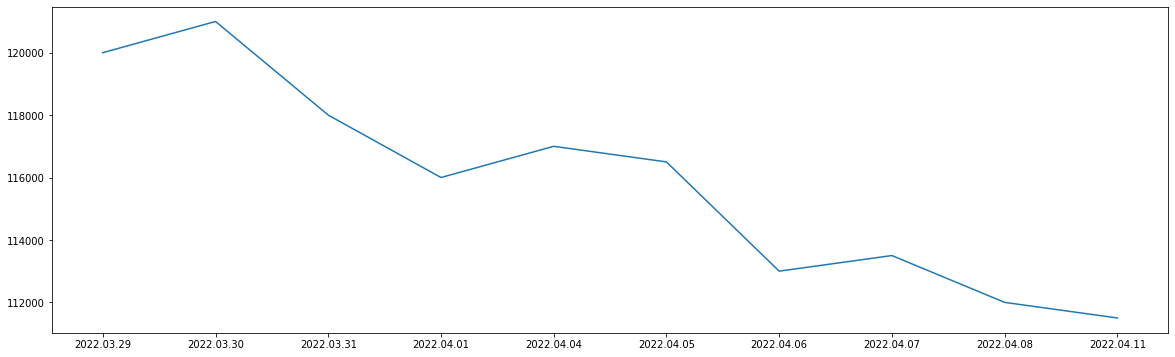

In [243]:
# 종가 그래프 출력(str)


### JSON 파싱
> 동적페이지 크롤링의 경우에는 일반적인 HTML text 형태의 데이터만을 사용하지 않습니다.  
JSON, xml 형식의 데이터도 통신에 사용하기에 요청결과값에 따른 처리가 필요합니다.

### 다음 주식 일자별 주가 데이터 크롤링 연습

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
0,A005930,2022-05-19 15:30:23,67500.0,15:30:23,FALL,600.0,-0.008811,68100.0,KOREA,66500.0,67600.0,66500.0,1147743790508,17073727,1147743790508,17073727,None
1,A005930,2022-05-18 15:30:14,68100.0,15:30:14,RISE,500.0,0.007396,67600.0,KOREA,68300.0,68700.0,67600.0,1122585202585,16486319,1122585202585,16486319,None
2,A005930,2022-05-17 15:30:21,67600.0,15:30:21,RISE,1300.0,0.019608,66300.0,KOREA,66600.0,67900.0,66600.0,1058322764800,15680447,1058322764800,15680447,None
3,A005930,2022-05-16 15:30:27,66300.0,15:30:27,FALL,200.0,-0.003008,66500.0,KOREA,67100.0,67400.0,66100.0,796060691900,11937555,796060691900,11937555,None
4,A005930,2022-05-13 15:30:18,66500.0,15:30:18,RISE,1600.0,0.024653,64900.0,KOREA,65300.0,66700.0,65200.0,962476162900,14551536,962476162900,14551536,None
5,A005930,2022-05-12 15:30:14,64900.0,15:30:14,FALL,800.0,-0.012177,65700.0,KOREA,65200.0,65500.0,64900.0,1069685385550,16414188,1069685385550,16414188,None
6,A005930,2022-05-11 15:30:01,65700.0,15:30:01,EVEN,0.0,0.000000,65700.0,KOREA,65500.0,66300.0,65200.0,812298026600,12330920,812298026600,12330920,None
7,A005930,2022-05-10 15:30:16,65700.0,15:30:16,FALL,400.0,-0.006051,66100.0,KOREA,65900.0,66300.0,65300.0,1132067708900,17235605,1132067708900,17235605,None
8,A005930,2022-05-09 15:30:29,66100.0,15:30:29,FALL,400.0,-0.006015,66500.0,KOREA,66300.0,66900.0,66100.0,787562955000,11858736,787562955000,11858736,None
9,A005930,2022-05-06 15:30:15,66500.0,15:30:15,FALL,1400.0,-0.020619,67900.0,KOREA,67000.0,67100.0,66500.0,957335193600,14356156,957335193600,14356156,None


### 네이버 데이터랩 인기검색어 크롤링

## APIs
> 어플리케이션  
웹 서비스 제공자가 사용자에게 정보를 제공하기 위한 통신프로그램  
일반적인 API의 경우 requests -> response 형태의 크롤링 방법과 동일한 형태를 취한다.  

### 네이버 파파고 API

번역이 필요한 한국어를 입력하세요 : 오늘 수업은 여기까지입니다. 수고하셨습니다.
That's all for today's class. Thank you for your efforts.


### 공공데이터 API

'{"resultCode":"0","resultMsg":"SUCCESS","numOfRows":10,"pageNo":0,"totalCount":377,"items":[{"date":"2018-07-01","positive":"2956","negative":"648","neutral":"295","addr":"홍대 걷고 싶은 거리"},{"date":"2018-08-01","positive":"2247","negative":"111","neutral":"200","addr":"홍대 걷고 싶은 거리"},{"date":"2018-09-01","positive":"3602","negative":"635","neutral":"436","addr":"홍대 걷고 싶은 거리"},{"date":"2018-10-01","positive":"2827","negative":"394","neutral":"623","addr":"홍대 걷고 싶은 거리"},{"date":"2018-11-01","positive":"2004","negative":"356","neutral":"583","addr":"홍대 걷고 싶은 거리"},{"date":"2018-12-01","positive":"1457","negative":"223","neutral":"173","addr":"홍대 걷고 싶은 거리"},{"date":"2019-01-01","positive":"1444","negative":"143","neutral":"127","addr":"홍대 걷고 싶은 거리"},{"date":"2019-02-01","positive":"6886","negative":"215","neutral":"220","addr":"홍대 걷고 싶은 거리"},{"date":"2019-03-01","positive":"1945","negative":"175","neutral":"160","addr":"홍대 걷고 싶은 거리"},{"date":"2019-04-01","positive":"1773","negative":"90","neutr